Look at what happens if we have chips from different vendors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from lsst.sims.maf.plots import PlotHandler

In [2]:
# Set the database and query
database = 'enigma_1189_sqlite.db'
#sqlWhere = 'filter = "r" and night < 200 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15), np.radians(-15))
sqlWhere = 'filter = "r" and expMJD < 49547.36 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15.), np.radians(-15.))
opsdb = db.OpsimDatabase(database)
outDir = 'Vendor'
resultsDb = db.ResultsDb(outDir=outDir)

In [15]:
nside=512
metric1 = metrics.CountMetric('expMJD')
metric2 = metrics.ChipVendorMetric('expMJD')
slicer = slicers.HealpixSlicer(nside=nside)
slicer2 = slicers.HealpixSlicer(nside=nside, useCamera=True, radius=1.9)
summaryMetrics = [metrics.SumMetric()]

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


In [16]:
bundle1 = metricBundles.MetricBundle(metric1,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric2,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database with constraint filter = "r" and expMJD < 49547.36 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 1 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


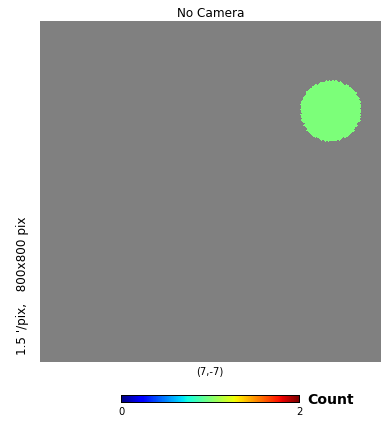

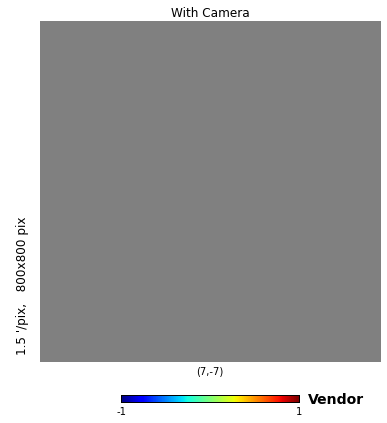

In [20]:
import healpy as hp
hp.gnomview(bundle1.metricValues, xsize=800,ysize=800, rot=(7,-7,0), title='No Camera', unit='Count')
hp.gnomview(bundle2.metricValues, xsize=800,ysize=800, rot=(7,-7,0),title='With Camera', unit='Vendor')

In [18]:
# Check to see what my vendor pattern looks like on a single chip
nside=512
slicer2 = slicers.HealpixSlicer(nside=nside, useCamera=True, radius=1.9)
sqlWhere = 'fieldID = 2266 and expMJD < 49593.3'
#sqlWhere = 'filter = "r" and expMJD < 49547.36 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15.), np.radians(-15.))
bundle2 = metricBundles.MetricBundle(metric2,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'WithCamera':bundle2},opsdb, outDir=outDir, 
                                     resultsDb=resultsDb)
bg.runAll()


Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint fieldID = 2266 and expMJD < 49593.3
Found 1 visits
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


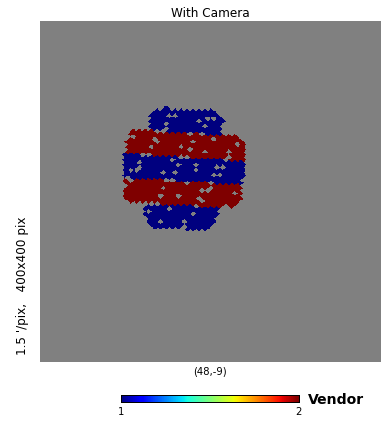

In [19]:
hp.gnomview(bundle2.metricValues, xsize=400,ysize=400, rot=(48,-9,0),
            title='With Camera', unit='Vendor')
